# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="left")


# Display the data table for preview
display(complete_data)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [99]:
# Checking the number of mice.
mice_data = complete_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [100]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = complete_data[complete_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_duplicate_ID= mice_duplicate["Mouse ID"].unique()
display(mice_duplicate_ID)

array(['g989'], dtype=object)

In [101]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_data = complete_data.loc[complete_data["Mouse ID"] == mice_duplicate_ID[0]]
mice_duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_complete_data=complete_data.drop_duplicates(subset=['Mouse ID'])
clean_complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [103]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_complete_data["Mouse ID"].unique()
clean_number_mice = len(clean_mice_data)
clean_number_mice


249

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen = complete_data.set_index(["Drug Regimen"])
group_drug = drug_regimen.groupby("Drug Regimen")
drug_regimen_mean = group_drug["Tumor Volume (mm3)"].mean()
drug_regimen_median = group_drug["Tumor Volume (mm3)"].median()
drug_regimen_var = group_drug["Tumor Volume (mm3)"].var()
drug_regimen_std = group_drug["Tumor Volume (mm3)"].std()
drug_regimen_sem = group_drug["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_total_df  = pd.DataFrame({"Mean Tumor Volume":drug_regimen_mean,
                                       "Median Tumor Volume":drug_regimen_median,
                                       "Tumor Volume Variance":drug_regimen_var,
                                       "Tumor Volume Standard Deviation.":drug_regimen_std,
                                       "Tumor Volume Standard SEM":drug_regimen_sem})
display(drug_regimen_total_df)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation.,Tumor Volume Standard SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [105]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_df = drug_regimen.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
display(drug_regimen_df)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: count, dtype: int64

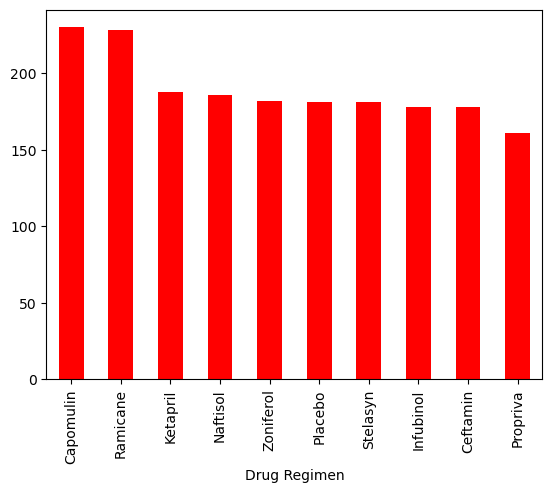

<Figure size 640x480 with 0 Axes>

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mouse_id_drugs= complete_data[["Drug Regimen","Timepoint"]]
Mouse_id_drugs

mouse_and_drugs =Mouse_id_drugs["Drug Regimen"].value_counts()
display(mouse_and_drugs)

mouse_and_drugs.plot(kind="bar",color = "red",align="center")
xlabel=("Drug Regimen")
ylabel=("Number of Mice Tested")

plt.show()
plt.tight_layout()


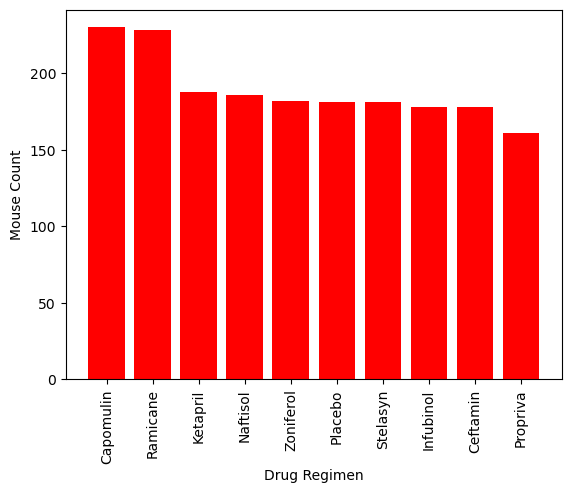

<Figure size 640x480 with 0 Axes>

In [107]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mouse_and_drugs.index.values
mouse_and_drugs_count = mouse_and_drugs.values

#graph build and display
#plt.figure(figsize=400,10)
plt.bar(drugs, mouse_and_drugs_count, color="red", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Mouse Count')
plt.xticks(rotation="vertical")
plt.show()
plt.tight_layout()

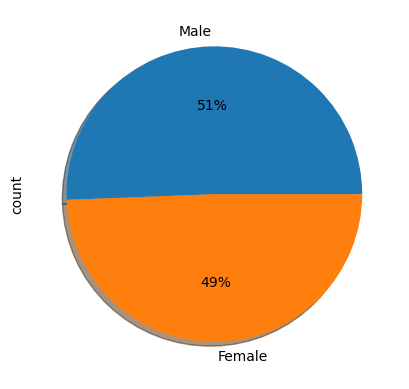

<Figure size 640x480 with 0 Axes>

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_and_male = complete_data["Sex"].value_counts()
#Sex = ["Male", "Female"]
#explode=(0.1,0,0,0)
female_and_male.plot(kind = "pie" , autopct="%1.0f%%", shadow=True, startangle=0) 

xlabel =("Female")
ylabel = ("Sex")
plt.show()
plt.tight_layout()


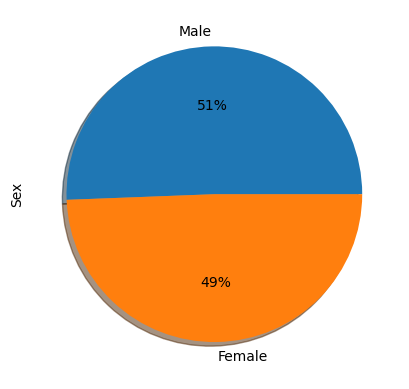

<Figure size 640x480 with 0 Axes>

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = female_and_male.index.values
count = female_and_male.values
plt.title=("Male")
plt.ylabel("Sex")
plt.pie(count, labels = sex_label, autopct="%1.0f%%",shadow=True, startangle=0)
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_data = complete_data.loc[(complete_data["Drug Regimen"] == "Capomulin") | 
                              (complete_data["Drug Regimen"] == "Ramicane") |
                              (complete_data["Drug Regimen"] == "Infubinol") |
                              (complete_data["Drug Regimen"] == "Ceftamin")]


#Start by getting the last (greatest) timepoint for each mouse
last_time_point = drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
start_last_time_point = last_time_point.reset_index()

reduced_last_time_point=start_last_time_point[["Drug Regimen", "Tumor Volume (mm3)"]]


capomulin_df = reduced_last_time_point.loc[reduced_last_time_point["Drug Regimen"] == "Capomulin"]


ramicane_df = reduced_last_time_point.loc[reduced_last_time_point["Drug Regimen"] == "Ramicane"]


infubinol_df = reduced_last_time_point.loc[reduced_last_time_point["Drug Regimen"] == "Infubinol"]


ceftamin_df = reduced_last_time_point.loc[reduced_last_time_point["Drug Regimen"] == "Ceftamin"]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
                   "Ramicane": ramicane_df["Tumor Volume (mm3)"],
                   "Infubinol": infubinol_df["Tumor Volume (mm3)"],
                   "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

display(df)

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [111]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = []
for drug in reduced_last_time_point["Drug Regimen"]:
    if drug not in treatments:
       treatments.append(drug)


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
lowerq = []
upperq = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments: 
    quartiles=df[drug].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

17.912664470000003
54.30681135


Text(0.5, 0, '')

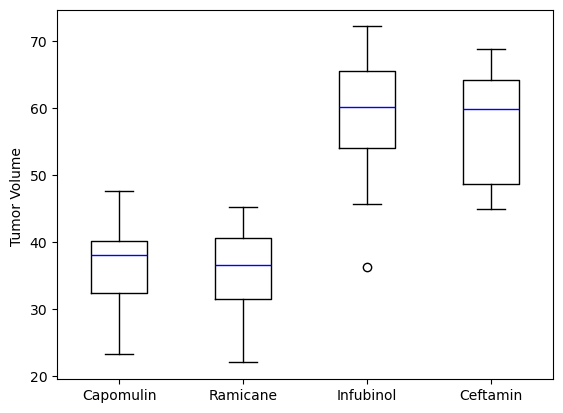

In [112]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = df.boxplot( color = dict(boxes = 'k', whiskers='k', medians='b'),grid=False)
boxplot.set_ylabel('Tumor Volume ')
boxplot.set_xlabel('')

## Line and Scatter Plots

In [113]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


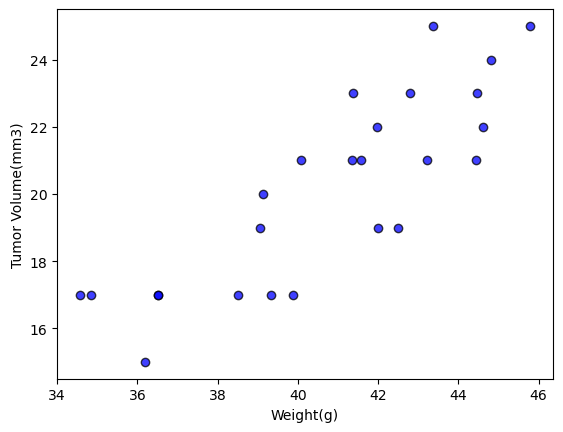

In [114]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = complete_data.loc[(complete_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = capomulin_df.groupby(["Mouse ID"])[["Weight (g)","Tumor Volume (mm3)"]].mean()
group_capomulin_df

#x_limits=100
#x_axis=np.range(0,x_limits,50)

plt.scatter(group_capomulin_df["Tumor Volume (mm3)"] ,group_capomulin_df["Weight (g)"],marker="o",facecolors="blue",edgecolors="black",alpha=0.75)
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume(mm3)")
plt.show()



## Correlation and Regression

In [116]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_average_weight=capomulin_df(["Mouse ID"]).mean()
average_tumor_volume=capomulin_df(["Tumor Volume (mm3)"]).mean()
                      
correlation= st.pearsonr(mouse_average_weight,average_tumor_volume) 

TypeError: 'DataFrame' object is not callable